<a href="https://colab.research.google.com/github/Roopa705/Traffic-Sign-Recognition/blob/main/sign_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #nd arrays
import pandas as pd #dataset operations (loading dataset and retreiving elements)
import matplotlib.pyplot as plt #ploting graphs and images
import cv2 #opencv
import PIL #python image library
from skimage import color, exposure, transform, io 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/Traffic_signs.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  inflating: train/5/00005_00054_00001.png  
  in

In [ ]:
train = pd.read_csv("Train.csv")
valid = pd.read_csv("Test.csv")
test = pd.read_csv("Meta.csv")

In [ ]:
train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
valid.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


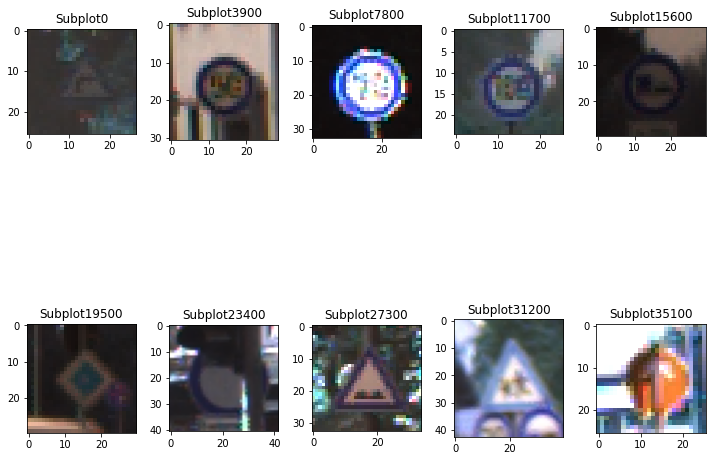

In [ ]:
import random
rows = 2
cols = 5
axes=[]
fig=plt.figure(figsize=(10,10))
i=0
for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Subplot"+str(i))
    axes[-1].set_title(subplot_title)  
    plt.imshow(cv2.imread(train["Path"][i]))
    i=i+3900
fig.tight_layout()    
plt.show()

In [ ]:

IMG_SIZE = 48
def preprocess(dataset):
    labels = []
    images = []
    label = dataset['ClassId']
    imgs = dataset['Path']
    x=0
    for i in imgs:
        img = cv2.imread(i)

        
        # Normalization
        img = img / (img.max() + 1)


        # Histogram normalization in v channel
        hsv = color.rgb2hsv(img)
        hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2])
        img = color.hsv2rgb(hsv)

        # central square crop
        min_side = min(img.shape[:-1])
        centre = img.shape[0] // 2, img.shape[1] // 2
        img = img[centre[0] - min_side // 2:centre[0] + min_side // 2,
                  centre[1] - min_side // 2:centre[1] + min_side // 2,
                  :]
                  

        # rescale to standard size
        img = transform.resize(img, (IMG_SIZE, IMG_SIZE))

        
        if x%5000==0:
            print(x, " images done")
            
        images.append(img)
        labels.append(label[x])
        x+=1
    print(x, " images done")
    X = np.array(images)
    Y = np.array(labels)
    
    return X,Y
        

In [ ]:
trainX, trainY = preprocess(train)

0  images done
5000  images done
10000  images done
15000  images done
20000  images done
25000  images done
30000  images done
35000  images done
39209  images done


In [ ]:
testX, testY = preprocess(valid)

0  images done
5000  images done
10000  images done
12630  images done


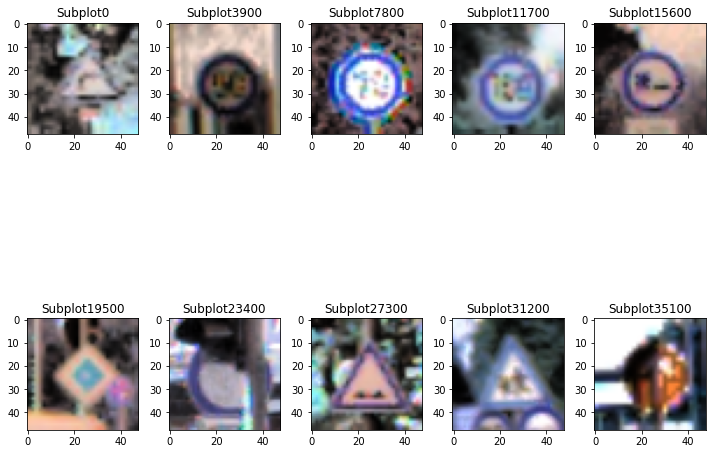

In [ ]:
rows = 2
cols = 5
axes=[]
fig=plt.figure(figsize=(10,10))
i=0
for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Subplot"+str(i))
    axes[-1].set_title(subplot_title)  
    plt.imshow(trainX[i])
    i=i+3900
fig.tight_layout()    
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.activations import relu
from tensorflow.keras.applications import DenseNet121, Xception, VGG16, ResNet50
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
from tensorflow.keras.utils import to_categorical
trainY_1 = to_categorical(trainY, 43)
testY_1 = to_categorical(testY, 43)

In [ ]:
trainY_1.shape

(39209, 43)

In [ ]:


dense = DenseNet121(
                include_top=False,
                weights="imagenet",
                input_shape=(IMG_SIZE,IMG_SIZE, 3),
            )


83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
dense.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 54, 54, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 24, 24, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 24, 24, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [ ]:
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

x = dense(inputs, training=True)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(43, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 43)                44075     
Total params: 7,081,579
Trainable params: 6,997,931
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])
model.fit(trainX, trainY_1, epochs=20, validation_data=(testX,testY_1), verbose=1)


Epoch 1/20
1226/1226 [==============================] - 56s 46ms/step - loss: 2.9806 - categorical_accuracy: 0.8232 - val_loss: 2.9271 - val_categorical_accuracy: 0.8754
Epoch 2/20
1226/1226 [==============================] - 53s 43ms/step - loss: 2.8947 - categorical_accuracy: 0.9067 - val_loss: 2.9126 - val_categorical_accuracy: 0.8884
Epoch 3/20
1226/1226 [==============================] - 52s 43ms/step - loss: 2.8866 - categorical_accuracy: 0.9145 - val_loss: 2.9148 - val_categorical_accuracy: 0.8865
Epoch 4/20
1226/1226 [==============================] - 53s 43ms/step - loss: 2.8683 - categorical_accuracy: 0.9328 - val_loss: 2.8848 - val_categorical_accuracy: 0.9162
Epoch 5/20
1226/1226 [==============================] - 52s 43ms/step - loss: 2.8553 - categorical_accuracy: 0.9460 - val_loss: 2.8933 - val_categorical_accuracy: 0.9076
Epoch 6/20
1226/1226 [==============================] - 52s 42ms/step - loss: 2.8426 - categorical_accuracy: 0.9582 - val_loss: 2.8665 - val_categoric

In [ ]:
  
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

model.fit(trainX, trainY_1, epochs=10, validation_data=(testX,testY_1))


Epoch 1/10
1226/1226 [==============================] - 55s 45ms/step - loss: 2.8221 - categorical_accuracy: 0.9783 - val_loss: 2.8547 - val_categorical_accuracy: 0.9455
Epoch 2/10
1226/1226 [==============================] - 53s 44ms/step - loss: 2.8198 - categorical_accuracy: 0.9806 - val_loss: 2.8527 - val_categorical_accuracy: 0.9477
Epoch 3/10
1226/1226 [==============================] - 52s 43ms/step - loss: 2.8190 - categorical_accuracy: 0.9814 - val_loss: 2.8512 - val_categorical_accuracy: 0.9489
Epoch 4/10
1226/1226 [==============================] - 52s 42ms/step - loss: 2.8184 - categorical_accuracy: 0.9820 - val_loss: 2.8493 - val_categorical_accuracy: 0.9510
Epoch 5/10
1226/1226 [==============================] - 52s 43ms/step - loss: 2.8174 - categorical_accuracy: 0.9830 - val_loss: 2.8482 - val_categorical_accuracy: 0.9519
Epoch 6/10
1226/1226 [==============================] - 52s 43ms/step - loss: 2.8169 - categorical_accuracy: 0.9835 - val_loss: 2.8473 - val_categoric

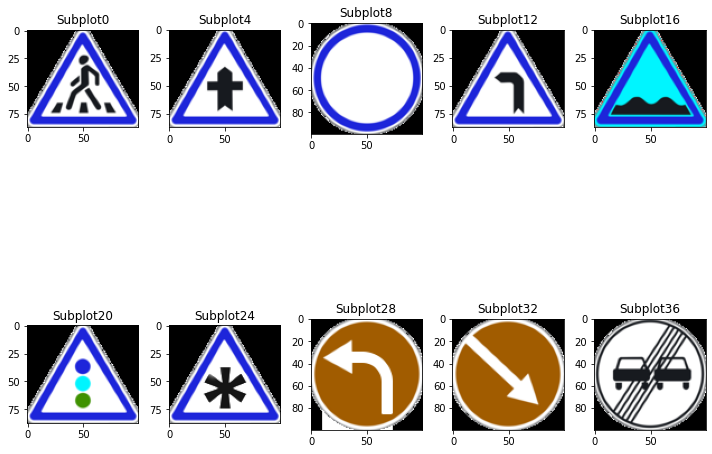

In [ ]:
rows = 2
cols = 5
axes=[]
fig=plt.figure(figsize=(10,10))
i=0
for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Subplot"+str(i))
    axes[-1].set_title(subplot_title)  
    plt.imshow(cv2.imread(test["Path"][i]))
    i=i+4
fig.tight_layout()    
plt.show()

In [ ]:
Final_test_x, Final_test_y = preprocess(test)

0  images done
43  images done


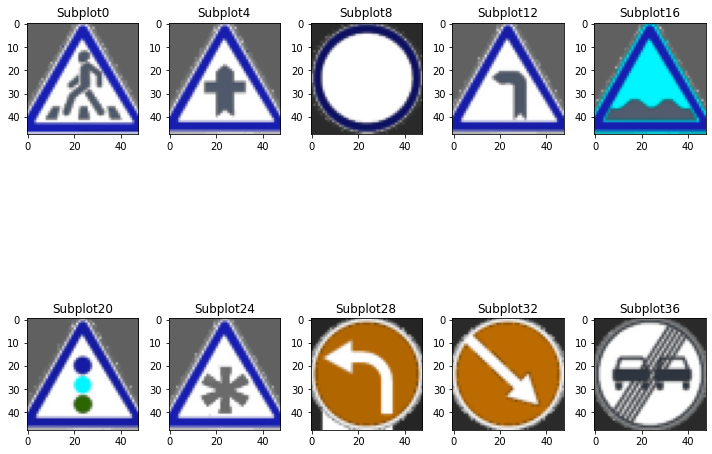

In [ ]:
rows = 2
cols = 5
axes=[]
fig=plt.figure(figsize=(10,10))
i=0
for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Subplot"+str(i))
    axes[-1].set_title(subplot_title)  
    plt.imshow(Final_test_x[i])
    i=i+4
fig.tight_layout()    
plt.show()

In [ ]:
pred = model.predict(Final_test_x)

In [ ]:
pred.shape

(43, 43)

In [ ]:
pred[1]

array([2.42061454e-10, 9.96377885e-01, 8.88745614e-17, 3.62217426e-03,
       2.83917583e-14, 3.66050574e-14, 1.03781824e-21, 2.03874001e-24,
       1.07809725e-16, 2.73999822e-21, 2.40969716e-10, 7.81637060e-22,
       9.96354533e-17, 4.92171909e-22, 2.65877149e-19, 1.55759507e-26,
       3.73548147e-17, 1.30154432e-25, 3.82338319e-23, 1.14762853e-16,
       9.58517177e-25, 1.00827211e-24, 1.83626429e-31, 5.40276326e-17,
       9.05430493e-34, 1.52568815e-24, 9.14482093e-29, 1.72841436e-18,
       1.18122959e-31, 9.87697999e-21, 1.84168745e-23, 3.74963054e-13,
       3.48876262e-26, 3.25910530e-30, 2.72438402e-22, 3.11244742e-30,
       8.03504001e-37, 1.99728805e-23, 1.31887197e-14, 1.42546515e-24,
       1.88721903e-11, 7.88676555e-27, 3.63850861e-18], dtype=float32)

In [ ]:
pred_f = []
for i in range(len(pred)):
  l=[]
  for j in range(len(pred[i])):
    if pred[i][j]>5e-01:
      l.append(1)
    else:
      l.append(0)
  pred_f.append(l)
pred_f = np.array(pred_f)
pred_f.shape

(43, 43)

In [ ]:
Final_test_y_1 = to_categorical(Final_test_y, 43)
Final_test_y_1.shape

(43, 43)

In [ ]:
Final_test_y_1[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
true = []
predicted = []
for i in range(43):
  for j in range(43):
    if Final_test_y_1[i][j]==1:
      true.append(j)
      break
for i in range(43):
  for j in range(43):
    if pred_f[i][j]==1:
      predicted.append(j)
      break

print(true)
print(predicted)

[27, 0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 5, 6, 7, 8, 9]
[11, 1, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 23, 2, 20, 25, 25, 20, 24, 2, 26, 28, 29, 2, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 4, 7, 41, 10, 2, 6, 1, 0, 9]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true,predicted)


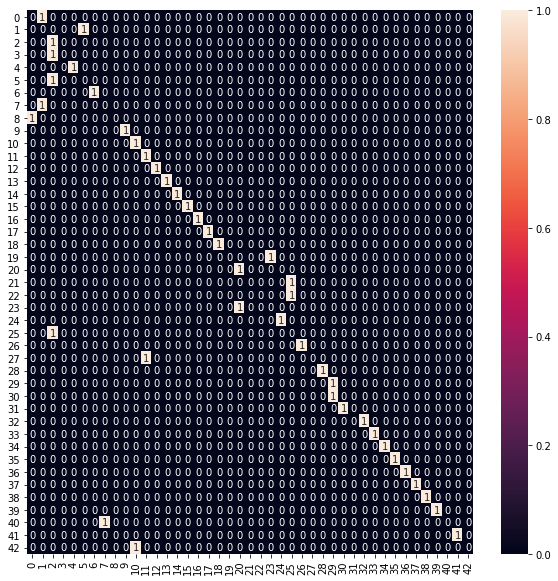

In [ ]:
import seaborn as sn

plt.figure(figsize = (10,10))
sn.heatmap(cm, annot=True)

In [ ]:
count = 0
for i in range(43):
  if true[i]==predicted[i]:
    count+=1
print(count,'/43')


27 /43


In [ ]:
from tensorflow.keras.models import load_model

model.save('my_model_densenet_2.h5')